In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import random
from sklearn.linear_model import LinearRegression

- напишіть функцію гіпотези лінійної регресії у векторному вигляді;

In [2]:
def hypothesis(X: np.array, w: np.array) -> np.array:
  return np.dot(X, w)

- створіть функцію для обчислення функції втрат у векторному вигляді;

In [3]:
def loss_func(h: np.array, y: np.array) -> float:
  m = y.size
  loss = (1 / (2 * m)) * np.sum(h - y) **2
  return loss


- реалізуйте один крок градієнтного спуску;

In [4]:
def gradient_step(X: np.array, y: np.array, w: np.array, lr = 0.01) -> np.array:
  m = y.size
  h = np.dot(X, h)
  gradient = (1 / m) * np.dot(X.T * (h-y))
  h -= lr * (1 / m) * np.dot(X.T * (h-y))
  return h



- знайдіть найкращі параметри **w** для датасету прогнозуючу ціну на будинок залежно від площі, кількості ванних кімнат та кількості спалень;

In [5]:
df = pd.read_csv('/content/Housing.csv')
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [61]:
df.describe()

,price,area,bedrooms,bathrooms
count,5.450000e+02,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239
std,1.870440e+06,2170.141023,0.738064,0.502470
min,1.750000e+06,1650.000000,1.000000,1.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000
max,1.330000e+07,16200.000000,6.000000,4.000000


In [6]:
# Create a data frame with the required data

df = df[['price', 'area', 'bedrooms', 'bathrooms']]
df.head()

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1


In [7]:
# Different features in a dataset have different scales and ranges.
# normalization of the target variable using the min-max normalization technique.
# after applying min-max normalization to a dataset, the values of our dataset are scaled to a range of 0 to 1.

y = df['price']
X = df[['area', 'bedrooms', 'bathrooms']]
X_norm = (X - X.min()) / (X.max() - X.min())

y_norm = (y - y.min()) / (y.max() - y.min())

y_n = pd.DataFrame(y_norm, columns=['price'])
y_n = y_n['price']


X_n = pd.DataFrame(X_norm, columns=['area', 'bedrooms', 'bathrooms'])
X_n = X_n[['area', 'bedrooms', 'bathrooms']]
X_n



,area,bedrooms,bathrooms
0,0.396564,0.6,0.333333
1,0.502405,0.6,1.000000
2,0.571134,0.4,0.333333
3,0.402062,0.6,0.333333
4,0.396564,0.6,0.000000
...,...,...,...
540,0.092784,0.2,0.000000
541,0.051546,0.4,0.000000
542,0.135395,0.2,0.000000
543,0.086598,0.4,0.000000


**Create simple model linear regression**

In [144]:
class SimpleLinearRegression:
  '''
  SimpleLinearRegression model implementation.

    Parameters:
        learning_rate (float): The learning rate for gradient descent. Default is 0.001.
        threshold (float): The convergence threshold for stopping the training. Default is 0.0001.
        n_epoch (int): The maximum number of training epochs. Default is 10000.

    Methods:
        predict(X): Predict the target variable for input features.
        update_w(X, y): Update the weight vector based on the input features and target variable.
        fit_values(X, y): Fit the model to the input features and target variable.

    Example Usage:
        mlr = SimpleLinearRegression(learning_rate=0.01, n_epoch=10000, threshold=0.0001)
        r = mlr.fit_values(X_n, y_n)
        print(r)
  '''
  def __init__(self, learning_rate : float = 0.001, threshold: float = 0.0001, n_epoch: int =10000):
    self.learning_rate = learning_rate
    self.threshold  = threshold
    self.n_epoch = n_epoch
    self.w = np.array([random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)])
    self.losses = []

  def predict(self, X: np.array) -> np.array:
    return X @ self.w

  def update_w(self, X: np.array, y: np.array):
    m = len(y)
    h = self.predict(X)
    self.w -= self.learning_rate / m * X.T @ (h - y)


  def fit_values(self, X: np.array, y: np.array):
        last_cost = 1000000
        for i in range(self.n_epoch):
            self.update_w(X, y)
            new_cost = loss_func(self.predict(X), y)
            self.losses.append(new_cost)
            #print(new_cost)

            if last_cost - new_cost < self.threshold :
                break
            last_cost = new_cost

        return new_cost, list(self.w)


slr = SimpleLinearRegression(learning_rate=0.01, n_epoch=10000, threshold=0.0001)

r = slr.fit_values(X_n, y_n)
print(r)


(0.028089503482873927, [0.3294333845833859, 0.3631734282043663, 0.30437472482179323])


- обчислення ленійної регресії за допомогою модуля LinearRegression із sklearn.linear_model


In [68]:
regressor = LinearRegression().fit(X_n, y_n)
w = regressor.coef_
w0 = regressor.intercept_
print('For normalized data')
print(f'Intercept = {w0}\nWeights = {w}')

For normalized data
Intercept = 0.04282739976995409
Weights = [0.47714269 0.17611257 0.36001286]


- аналітичне рішення

In [67]:
X_an = np.hstack((np.ones((y.size, 1)), X_n))
w_an = np.linalg.inv(X_an.T @ X_an) @ X_an.T @ y_n
print('For normalized data')
print(f'Intercept = {w_an[0]}\nWeights = {w_an[1:]}')

For normalized data
Intercept = 0.04282739976994895
Weights = [0.47714269 0.17611257 0.36001286]


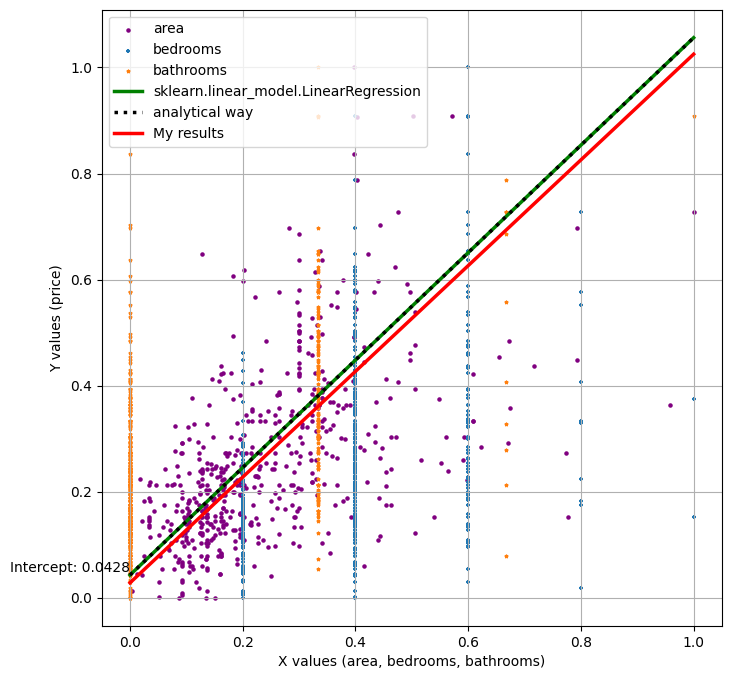

In [145]:
plt.figure(figsize=(8,8))
intercept = w0
plt.scatter(X_n['area'], y_n, marker = 'o', s = 5, color='purple', label='area')
plt.scatter(X_n['bedrooms'], y_n, marker = '+', s = 5, label='bedrooms')
plt.scatter(X_n['bathrooms'], y_n, marker = '*', s = 5, label='bathrooms')
x = np.linspace(X_n['area'].min(), X_n['area'].max())
plt.plot(x, (w0 + w[0] * x + w[1] * x + w[2] * x), color = 'g', label = 'sklearn.linear_model.LinearRegression', linewidth=2.5)
plt.plot(x, (w_an[0] + w_an[1] * x + w_an[2] * x + w_an[3] * x), color = 'black', linestyle = 'dotted', label = 'analytical way', linewidth=2.5)
plt.plot(x, (r[0] + r[1][0] * x + r[1][1] * x + r[1][2] * x), color='r', label = 'My results', linewidth=2.5)
plt.xlabel('X values (area, bedrooms, bathrooms)')
plt.ylabel('Y values (price)')
plt.text(x[0], w0, f'Intercept: {intercept.round(4)}', ha='right', va='bottom')
plt.grid()
plt.legend()
plt.show()

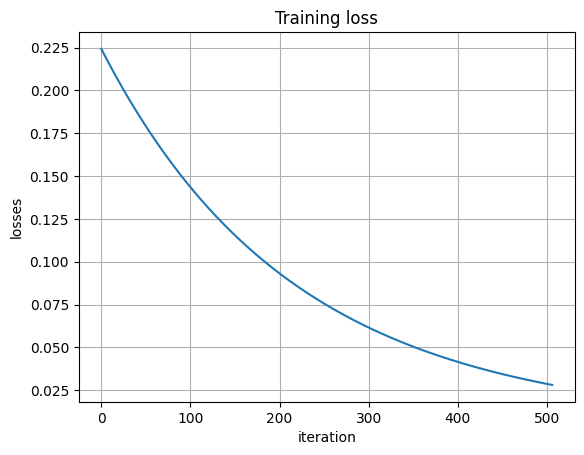

In [147]:
import seaborn as sns
import matplotlib.pyplot as plt

loss_df = pd.DataFrame(slr.losses, columns = ['losses'])
loss_df['iteration'] = np.arange(loss_df.size)
loss_df
sns.lineplot(x = 'iteration', y = 'losses', data = loss_df)
plt.title('Training loss')
plt.grid()
plt.show()



**Висновок**

При пошуку вектору вагів різними способами отримано приблизно однакові значення.
LinearRegression із sklearn.linear_model і аналітичний метод дав однакові результати.
Самописний модуль домоміг розібратись в принципах роботи модуля LinearRegression із sklearn.linear_model.
Для оптимального обчислення вектору вагів, уникнення аномальних викидів та числової незбалансованості необхідно нормалізувати данні,
тобто привести значення фітчерів до однакової розмірності ( в даному завданні використовувалася Min-Max normalization, діапозон значень від 0 до 1)